
## 1. NumPy ⚡️
**NumPy** is the core library for numerical computing. It lets us work with powerful data structures called **arrays**, making math operations incredibly fast. Almost all other data libraries are built on it.

---
## 2. Pandas 🐼
**Pandas** is used for data manipulation and analysis. Its main tool is the **DataFrame**, which is like a smart spreadsheet or table in our code. We use it to **read, clean, and explore** our data.

---
## 3. Matplotlib 📊
**Matplotlib** is for **data visualization**. It helps us create charts and plots (like line graphs, bar charts, and scatter plots) to see patterns in our data and share our findings.

---
## 4. Scikit-learn 🤖
**Scikit-learn** is the most popular library for **machine learning**. It provides easy-to-use tools for building and training models to make predictions (e.g., classification and regression).

---
## 5. Gradio ✨
**Gradio** is a cool library that lets us quickly build a simple **web app (UI)** for our machine learning model. It's the easiest way to create an interactive demo that anyone can use.

In [1]:
!pip install pandas numpy scikit-learn matplotlib gradio


**Load the Dataset**
: Reads your CSV into a DataFrame

In [2]:
import pandas as pd

df = pd.read_csv('studentPerformance.csv')

print(df.head())  # Utility: Peek at data to confirm structure and values


   Study_Hours  Attendance  Practice_Tests  Final_Score  Pass_Fail
0     3.745401   59.256646               1    53.580408          1
1     9.507143   77.095047               2    84.990141          1
2     7.319939   93.647292               3   100.000000          1
3     5.986585   86.611244               1    76.978847          1
4     1.560186   90.328057               0    46.875418          0


**Check Data Quality**

In [3]:
print(df.shape)
print(df.describe())  # Stats: Averages, mins/maxes—spot outliers or biases
print(df.isnull().sum())

(500, 5)
       Study_Hours  Attendance  Practice_Tests  Final_Score   Pass_Fail
count   500.000000  500.000000      500.000000   500.000000  500.000000
mean      4.985617   75.877906        2.068000    70.749858    0.840000
std       2.986884   14.859647        1.448991    19.537338    0.366973
min       0.050616   50.246999        0.000000    14.941156    0.000000
25%       2.412797   62.061402        1.000000    55.231234    1.000000
50%       5.131637   76.986917        2.000000    70.714751    1.000000
75%       7.561249   88.867188        3.000000    86.895891    1.000000
max       9.929648   99.970686        7.000000   100.000000    1.000000
Study_Hours       0
Attendance        0
Practice_Tests    0
Final_Score       0
Pass_Fail         0
dtype: int64


**Visualize Data**

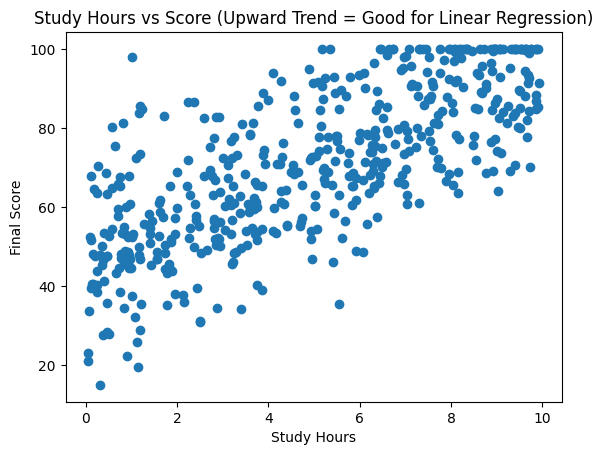

In [4]:
import matplotlib.pyplot as plt

# Scatter plot for linear trend
plt.scatter(df['Study_Hours'], df['Final_Score'])
plt.xlabel('Study Hours')
plt.ylabel('Final Score')
plt.title('Study Hours vs Score (Upward Trend = Good for Linear Regression)')
plt.show()  # Utility: Confirm data patterns in your dataset

**Split Data into Train/Test**

In [5]:
from sklearn.model_selection import train_test_split

# Features (inputs) and labels (outputs)
features = df[['Study_Hours', 'Attendance', 'Practice_Tests']]
score_label = df['Final_Score']  # For linear regression
pass_label = df['Pass_Fail']  # For logistic regression

# Split: 80% train, 20% test
X_train, X_test, y_score_train, y_score_test = train_test_split(features, score_label, test_size=0.2, random_state=42)
_, _, y_pass_train, y_pass_test = train_test_split(features, pass_label, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)  # Utility: Verify split sizes

(400, 3) (100, 3)


**Build and Train Linear Regression Model** **:**

**Train the Model**

In [6]:
from sklearn.linear_model import LinearRegression

model_linear = LinearRegression()  # Create model
model_linear.fit(X_train, y_score_train)  # Train: Learns from your data
print(model_linear.coef_, model_linear.intercept_)  # Utility: See feature weights

[4.63052983 0.35015606 6.91755248] 6.8554577835486725


**Make Predictions and Evaluate**

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

preds_score = model_linear.predict(X_test)  # Predict
mse = mean_squared_error(y_score_test, preds_score)  # Error measure
r2 = r2_score(y_score_test, preds_score)  # Fit measure

print(f'MSE: {mse:.2f} (Lower is better), R²: {r2:.2f} (Higher is better)')

MSE: 31.68 (Lower is better), R²: 0.90 (Higher is better)


**Visualize Predictions**

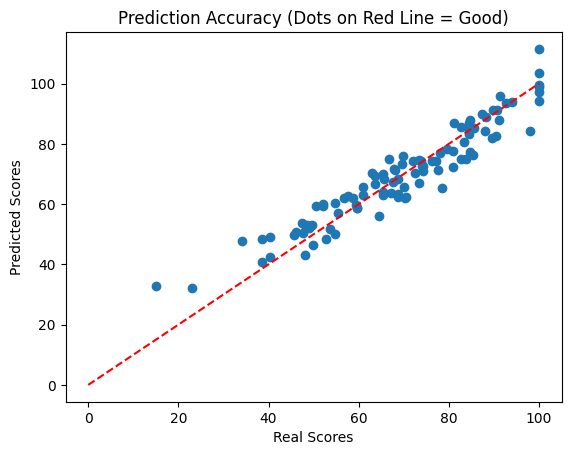

In [8]:
plt.scatter(y_score_test, preds_score)
plt.xlabel('Real Scores')
plt.ylabel('Predicted Scores')
plt.title('Prediction Accuracy (Dots on Red Line = Good)')
plt.plot([0,100], [0,100], 'r--')  # Ideal line
plt.show()

**Build and Train Logistic Regression Model** **:**

**Train the Model**

In [9]:
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression()  # Create model
model_logistic.fit(X_train, y_pass_train)  # Train on your data

LogisticRegression()

**Make Predictions and Evaluate**

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

preds_pass = model_logistic.predict(X_test)  # Predict
accuracy = accuracy_score(y_pass_test, preds_pass)
precision = precision_score(y_pass_test, preds_pass)
recall = recall_score(y_pass_test, preds_pass)

print(f'Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}')

cm = confusion_matrix(y_pass_test, preds_pass)
print('Confusion Matrix:\n', cm)  # Utility: Analyze mistakes

Accuracy: 0.91, Precision: 0.92, Recall: 0.98
Confusion Matrix:
 [[10  7]
 [ 2 81]]


**Build the Interactive App** **:**

**Define Prediction Function**



In [11]:
import gradio as gr

def predict(hours, attendance, tests):
    inputs = [[hours, attendance, tests]]
    score = model_linear.predict(inputs)[0]
    pass_prob = model_logistic.predict_proba(inputs)[0][1]
    pass_fail = "Pass" if pass_prob > 0.5 else "Fail"
    return f"Predicted Score: {score:.1f}/100\nPass/Fail: {pass_fail} ({pass_prob*100:.1f}% chance)"

**Launch the App**

In [12]:
demo = gr.Interface(
    fn=predict,
    inputs=["number", "number", "number"],
    outputs="text",
    title="Student Exam Predictor",
    description="Enter study hours (0-10), attendance (50-100%), practice tests (0-5+)."
)
demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0159fe6800994fa8bd.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
